In [1]:
#Import libraries
import pandas as pd
from pandas_datareader.data import DataReader
import datetime
import functools
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

## Data Wrangling

In [2]:
# Create a function that reads the data from yahoo finance
def stock_data(ticker, data_source, start, end):
    df = DataReader(ticker, data_source, start, end)['Adj Close']
    df = df.to_frame(ticker) 
    return df

In [3]:
#Define variables of data source, start and end date
start = datetime.date(2000,1,1)
end = datetime.date(2020,8,31)
source = 'yahoo'

In [4]:
#Get the data from the stocks we would like to make the data serie analysis
aapl = stock_data('AAPL', source, start, end)
aal = stock_data('AAL', source, start, end)
f = stock_data('F', source, start, end)
ba = stock_data('B', source, start, end)
msft = stock_data('MSFT', source, start, end)
tsla = stock_data('TSLA', source, start, end)
gm = stock_data('GM', source, start, end)

In [5]:
#Read the oil price
oil = pd.read_csv('OPEC-ORB.csv', index_col = 0)
oil.index = pd.to_datetime(oil.index)
oil.rename( columns = {'Value': 'Oil Price'}, inplace = True)

In [6]:
# Define a function to merge the different data frames
def merge_df(df1, df2, df3, df4, df5, df6, df7, df8):
    df = [df1, df2, df3, df4, df5, df6, df7, df8]
    return functools.reduce(lambda left, right : pd.merge(left, right, how = 'inner', on = 'Date'), df)

In [7]:
#Data Frame we are going to make the times series
df = merge_df(oil, aapl, aal, f, ba, msft, tsla, gm).sort_values(by = 'Date', ascending = True)

In [8]:
#Info function on the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2459 entries, 2010-11-18 to 2020-08-31
Data columns (total 8 columns):
Oil Price    2459 non-null float64
AAPL         2459 non-null float64
AAL          2459 non-null float64
F            2459 non-null float64
B            2459 non-null float64
MSFT         2459 non-null float64
TSLA         2459 non-null float64
GM           2459 non-null float64
dtypes: float64(8)
memory usage: 172.9 KB


In [9]:
#Check if there is NaN values
df.isna().sum()

Oil Price    0
AAPL         0
AAL          0
F            0
B            0
MSFT         0
TSLA         0
GM           0
dtype: int64

In [10]:
# See the first 5 heads
df.head(n = 5)

,Oil Price,AAPL,AAL,F,B,MSFT,TSLA,GM
Date,,,,,,,,
2010-11-18,81.09,9.518800,10.389011,10.878832,17.202944,20.598387,5.978,26.155519
2010-11-19,81.41,9.466335,10.445576,10.986811,17.255575,20.478817,6.198,26.209070
2010-11-22,80.96,9.670953,10.539850,10.932823,17.159073,20.510700,6.680,26.071363
2010-11-23,80.14,9.528057,10.464431,10.595387,16.623957,20.024443,6.914,25.436413
2010-11-24,81.16,9.715391,11.067785,10.764105,17.001169,20.223730,7.094,25.612371


## Data Visualization

### Plot the Multiple times series 

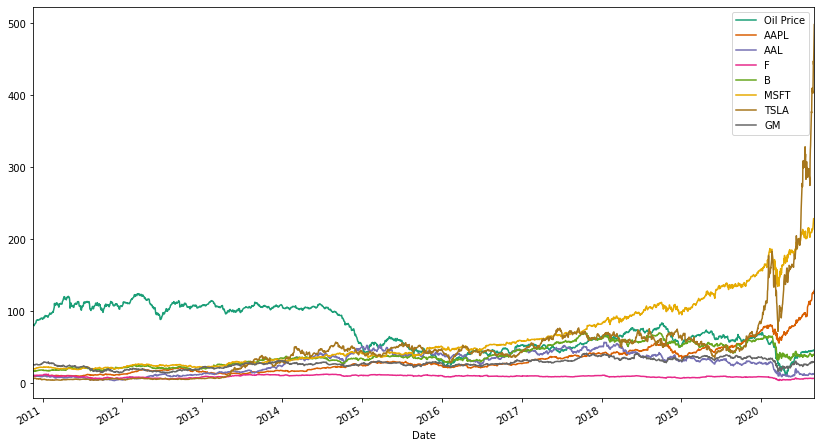

In [11]:
#Plot 
df.plot(cmap = 'Dark2', figsize = (14,8))
plt.legend(loc = 'best')
plt.show()

### Correlation among the stocks and the oil price

In [17]:
#Define the function to create the correlation matrix
def correlation_matrix(df, method):
    return df.corr(method = method)

In [18]:
#Define the function for the correlation heatmap
def correlation_matrix_heatmap(df, method):
    return sns.heatmap(df.corr(method = method))

#### Pearson Correlation

In [19]:
#Correlation Matrix
correlation_matrix(df, 'pearson')

,Oil Price,AAPL,AAL,F,B,MSFT,TSLA,GM
Oil Price,1.000000,-0.569864,-0.600034,0.053583,-0.528762,-0.559630,-0.532003,-0.434976
AAPL,-0.569864,1.000000,0.210101,-0.392157,0.658521,0.972838,0.869118,0.510619
AAL,-0.600034,0.210101,1.000000,0.486661,0.693482,0.170525,0.166272,0.672544
F,0.053583,-0.392157,0.486661,1.000000,0.020007,-0.409135,-0.257315,0.327604
B,-0.528762,0.658521,0.693482,0.020007,1.000000,0.668030,0.433225,0.864549
MSFT,-0.559630,0.972838,0.170525,-0.409135,0.668030,1.000000,0.800308,0.554716
TSLA,-0.532003,0.869118,0.166272,-0.257315,0.433225,0.800308,1.000000,0.326621
GM,-0.434976,0.510619,0.672544,0.327604,0.864549,0.554716,0.326621,1.000000


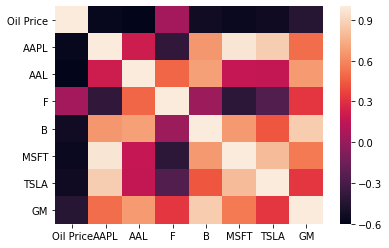

In [20]:
#Correlation heatmap
correlation_matrix_heatmap(df, 'pearson')

#### Kendall Correlation

In [21]:
#Correlation Matrix
correlation_matrix(df, 'kendall')

,Oil Price,AAPL,AAL,F,B,MSFT,TSLA,GM
Oil Price,1.000000,-0.357541,-0.395146,-0.017920,-0.283564,-0.426216,-0.418338,-0.199487
AAPL,-0.357541,1.000000,0.348891,-0.188199,0.684123,0.845284,0.693825,0.502153
AAL,-0.395146,0.348891,1.000000,0.313833,0.500386,0.345255,0.439463,0.454705
F,-0.017920,-0.188199,0.313833,1.000000,-0.008041,-0.182664,-0.056061,0.183373
B,-0.283564,0.684123,0.500386,-0.008041,1.000000,0.690907,0.678415,0.663199
MSFT,-0.426216,0.845284,0.345255,-0.182664,0.690907,1.000000,0.716288,0.533846
TSLA,-0.418338,0.693825,0.439463,-0.056061,0.678415,0.716288,1.000000,0.478320
GM,-0.199487,0.502153,0.454705,0.183373,0.663199,0.533846,0.478320,1.000000


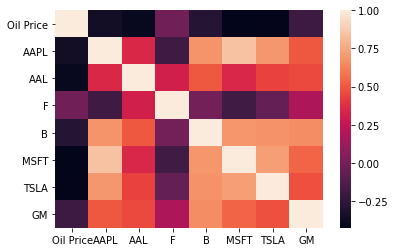

In [22]:
#Correlation Heatmap
correlation_matrix_heatmap(df, 'kendall')

#### Spearman Correlation

In [23]:
#Correlation Matrix
correlation_matrix(df, 'spearman')

,Oil Price,AAPL,AAL,F,B,MSFT,TSLA,GM
Oil Price,1.000000,-0.630462,-0.573740,-0.035570,-0.519639,-0.672812,-0.629853,-0.360770
AAPL,-0.630462,1.000000,0.506275,-0.236312,0.875923,0.964765,0.885421,0.685917
AAL,-0.573740,0.506275,1.000000,0.463820,0.687890,0.494634,0.586815,0.635870
F,-0.035570,-0.236312,0.463820,1.000000,-0.003826,-0.183584,-0.063842,0.247044
B,-0.519639,0.875923,0.687890,-0.003826,1.000000,0.881205,0.862261,0.857654
MSFT,-0.672812,0.964765,0.494634,-0.183584,0.881205,1.000000,0.892560,0.723146
TSLA,-0.629853,0.885421,0.586815,-0.063842,0.862261,0.892560,1.000000,0.662507
GM,-0.360770,0.685917,0.635870,0.247044,0.857654,0.723146,0.662507,1.000000


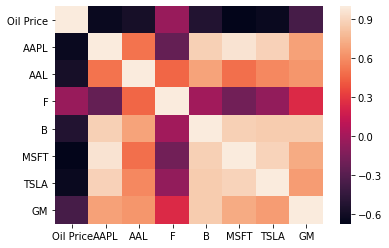

In [24]:
#Correlation Heatmap
correlation_matrix_heatmap(df, 'spearman')

### Autocorrelation

In [25]:
#Define a data frame with the rate of return of the stocks and if the oil price increased, decreased or was the same
df_change = df.pct_change().dropna()

In [26]:
df_change.head(n = 5)

,Oil Price,AAPL,AAL,F,B,MSFT,TSLA,GM
Date,,,,,,,,
2010-11-19,0.003946,-0.005512,0.005445,0.009926,0.003059,-0.005805,0.036802,0.002047
2010-11-22,-0.005528,0.021615,0.009025,-0.004914,-0.005593,0.001557,0.077767,-0.005254
2010-11-23,-0.010128,-0.014776,-0.007156,-0.030865,-0.031186,-0.023708,0.035030,-0.024354
2010-11-24,0.012728,0.019661,0.057658,0.015924,0.022691,0.009952,0.026034,0.006918
2010-11-26,0.014539,0.000636,-0.003407,0.009404,-0.013989,-0.004730,-0.004229,0.009558


In [27]:
#Compute autocorrelation
df_change['AAPL'].autocorr()

-0.059204188150011355

In [28]:
## Define a function that plots the autocorrelation
def plot_autocorrelation(x, lags, alpha):
    fig = plot_acf(x, lags = lags, alpha = alpha)
    return plt.show()

#### Oil Price

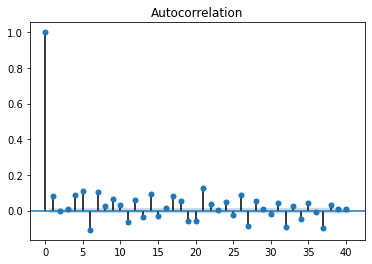

In [29]:
plot_autocorrelation(df_change['Oil Price'], lags = 40, alpha = 0.5)

#### Apple

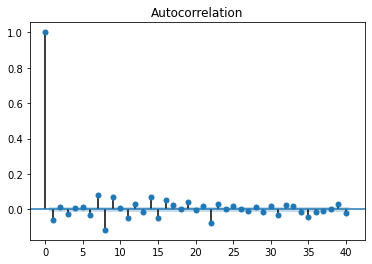

In [30]:
plot_autocorrelation(df_change['AAPL'], lags = 40, alpha = 0.5)

#### Tesla

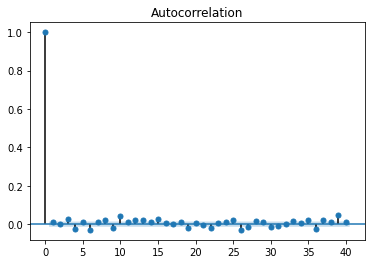

In [31]:
plot_autocorrelation(df_change['TSLA'], lags = 40, alpha = 0.5)

#### AAL

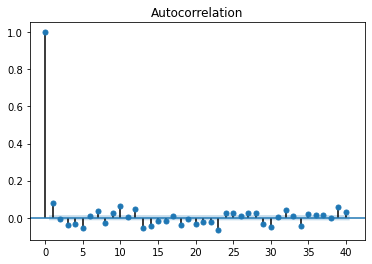

In [32]:
plot_autocorrelation(df_change['AAL'], lags = 40, alpha = 0.5)

#### MSFT

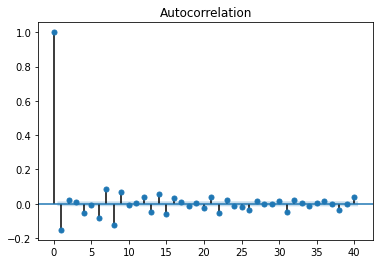

In [33]:
plot_autocorrelation(df_change['MSFT'], lags = 40, alpha = 0.5)

#### B

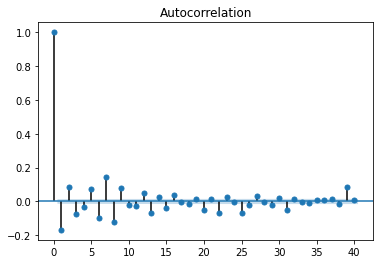

In [34]:
plot_autocorrelation(df_change['B'], lags = 40, alpha = 0.5)

### Decomposition Analysis

In [35]:
def decomposition_analysis(x, model, freq):
    return seasonal_decompose(x = x , model = model , freq = freq)

In [36]:
#Apply the function for the columns
stock_columns = list(df.columns)
stocks_decompose = []
trends = []
seasonals = []
residuals = []
observeds = []

for stock in stock_columns:
    #Decomposition
    decomposition = decomposition_analysis(x = df[stock], model = 'multiplicative', freq = 252)
    stocks_decompose.append(decomposition)
    
    #Trend
    trend = decomposition.trend
    trends.append(trend)
    
    #Seasonal
    seasonal = decomposition.seasonal
    seasonals.append(seasonal)
    
    #Residual
    residual = decomposition.resid
    residuals.append(residual)
    
    #Observed
    observed = decomposition.observed
    observeds.append(observed)

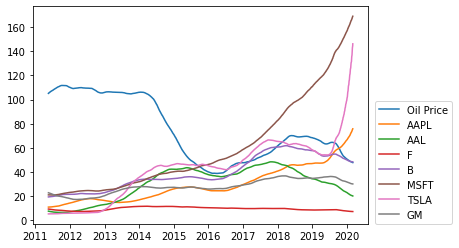

In [37]:
#Plot the trend for the stocks
for i, j in enumerate(stock_columns):
    plt.plot(trends[i], label = j)
    plt.legend(loc = (1.02, 0))
    continue

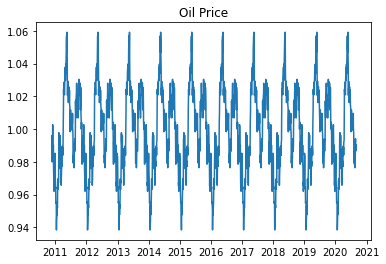

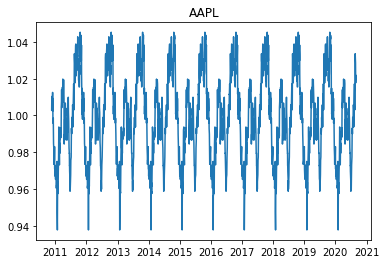

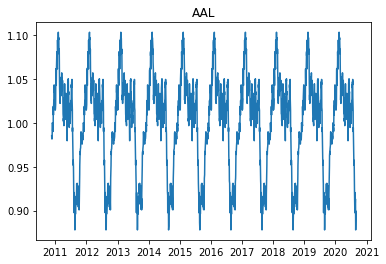

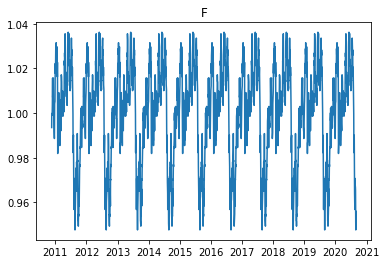

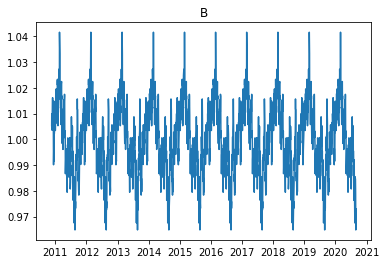

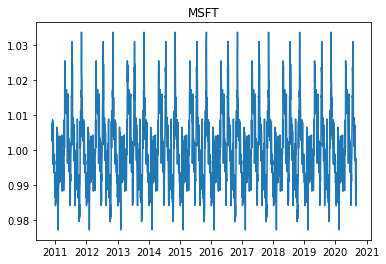

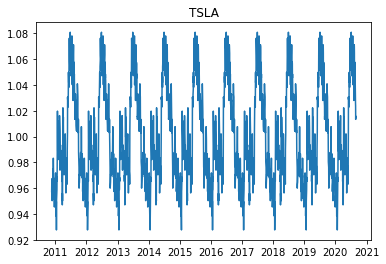

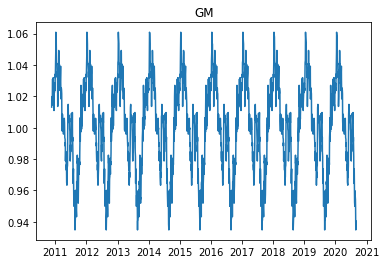

In [38]:
#Plot the seasonals for stocks
for i, j in enumerate(stock_columns):
    plt.plot(seasonals[i])
    plt.title(j)
    plt.show()

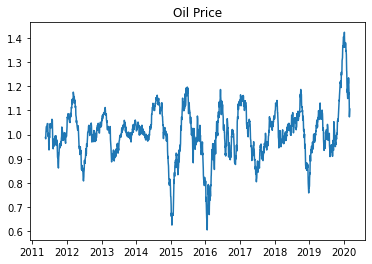

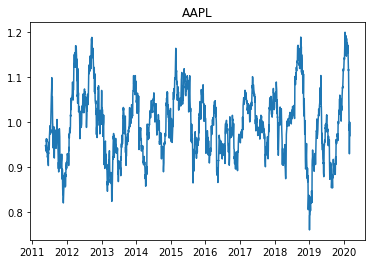

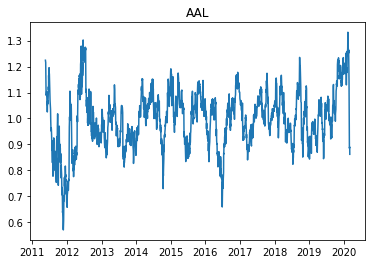

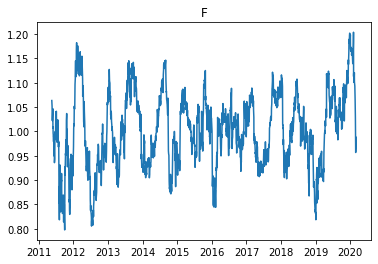

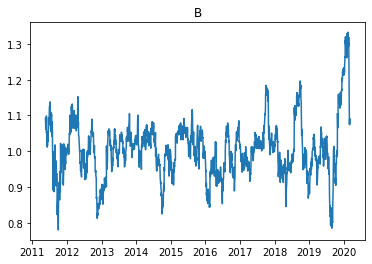

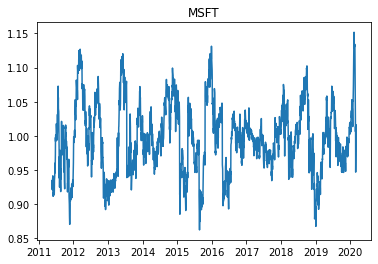

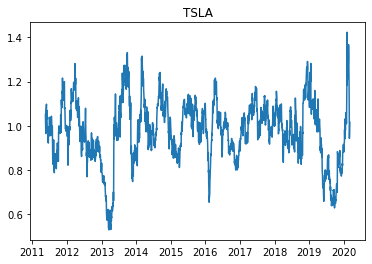

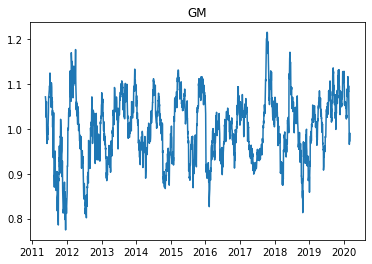

In [40]:
#Plot the residuals for each stock
for i, j in enumerate(stock_columns):
    plt.plot(residuals[i])
    plt.title(j)
    plt.show()
    continue